In [23]:
import sys
import json
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from src.data import load_qa_format_source

In [20]:
projectdir = Path('..')

train_path = projectdir / 'data/input/STATICS/STATICS_train.csv'
test_path = projectdir / 'data/input/STATICS/STATICS_test.csv'
id_path = projectdir / 'data/input/STATICS/STATICS_qid_sid_sname'
assert train_path.exists()
assert test_path.exists()
assert id_path.exists()

train_qa = load_qa_format_source(train_path)
test_qa = load_qa_format_source(test_path)
del train_path
del test_path

In [10]:
pd.read_table(id_path)

,qid,skillid,skillname
0,1,1,identify_interaction
1,2,2,gravitational_forces
2,3,3,represent_interaction_spring
3,4,4,represent_interaction_cord
4,5,1,identify_interaction
...,...,...,...
1218,1219,11,NaN
1219,1220,11,NaN
1220,1221,11,NaN
1221,1222,11,NaN


In [12]:
with open(projectdir / 'output/20_0310_edm2020_statics/pre_dummy_epoch_size0.auto/report/20200310-0202/report.json', 'r') as f:
    report_pre00 = json.load(f)
with open(projectdir / 'output/20_0310_edm2020_statics/pre_dummy_epoch_size10.auto/report/20200310-0404/report.json', 'r') as f:
    report_pre10 = json.load(f)

In [44]:
ndcg_00 = report_pre00['indicator']['RPhard']['all']
ndcg_10 = report_pre10['indicator']['RPhard']['all']

In [54]:
count = defaultdict(list)
for seq in train_qa+test_qa:
    for q, a in seq:
        count[q-1].append(a)
        
assert set(count.keys()) == set(range(1223))
count = [count[i] for i in range(1223)]
count_list = [len(count[i]) for i in range(1223)]

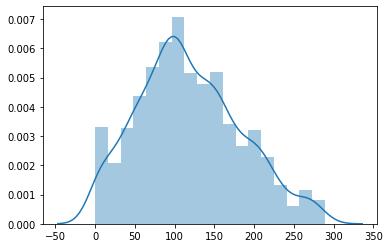

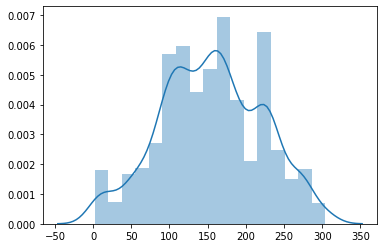

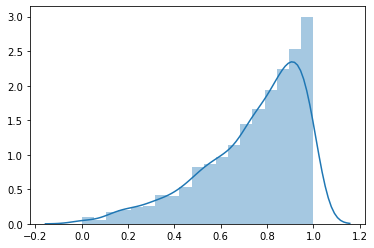

In [56]:
sns.distplot([sum(l) for l in count])
plt.show()
sns.distplot([len(l) for l in count])
plt.show()
sns.distplot([sum(l)/len(l) for l in count])
plt.show()

### 相関分析（pre 0 vs pre 10）
ndcg_00はpre 0, ndcg_10はpre 10の結果

#### KCの出現数とNDCGの相関

Corr coef = -0.017273767116509027


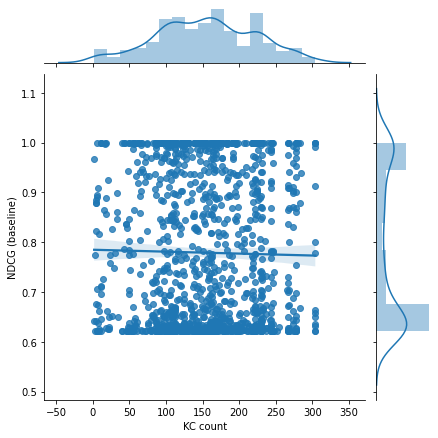

In [80]:
# 1.1
corrcoef = np.corrcoef(x=count_list, y=ndcg_00)[0][1]
print("Corr coef =", corrcoef)
ax = sns.jointplot(x=count_list, y=ndcg_00, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG (baseline)")
plt.show()

Corr coef = [[ 1.         -0.12971755]
 [-0.12971755  1.        ]]


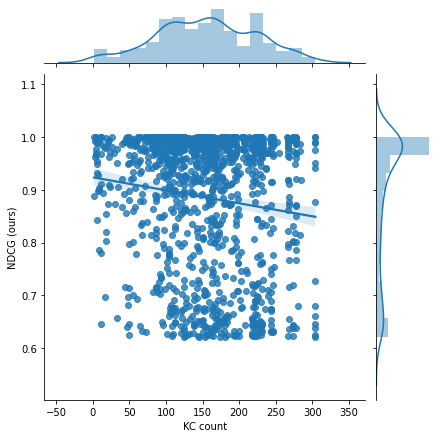

In [79]:
# 1.2
corrcoef = np.corrcoef(x=count_list, y=ndcg_10)
print("Corr coef =", corrcoef)
sns.jointplot(x=count_list, y=ndcg_10, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG (ours)")
plt.show()

Corr coef = [[ 1.         -0.06907159]
 [-0.06907159  1.        ]]


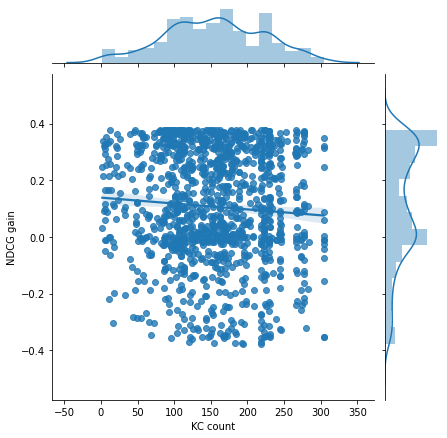

In [78]:
# 1.6
_y = [n10 - n0 for n10, n0 in zip(ndcg_10, ndcg_00)]
corrcoef = np.corrcoef(x=count_list, y=_y)
print("Corr coef =", corrcoef)
sns.jointplot(x=count_list, y=_y, kind='reg')
plt.xlabel("KC count")
plt.ylabel("NDCG gain")
plt.show()

#### KCの正解率とNDCGの相関
(1.3)は正解率の低い問題でNDCGがやや低い傾向がみてとれる

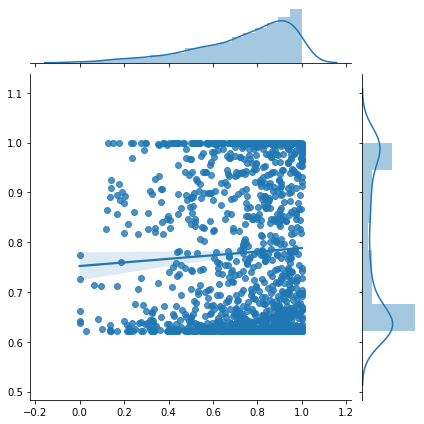

In [58]:
# 1.3
sns.jointplot(x=[sum(l)/len(l) for l in count], y=ndcg_00, kind='reg')

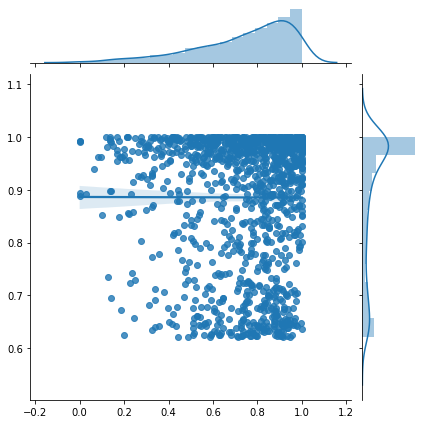

In [57]:
# 1.4
sns.jointplot(x=[sum(l)/len(l) for l in count], y=ndcg_10, kind='reg')

#### 出現数と正解率の関係

結果考察：難しい問題はときたがらない，かんたんな問題は繰り返しがち，という傾向があるのか？

[[1.         0.27203797]
 [0.27203797 1.        ]]


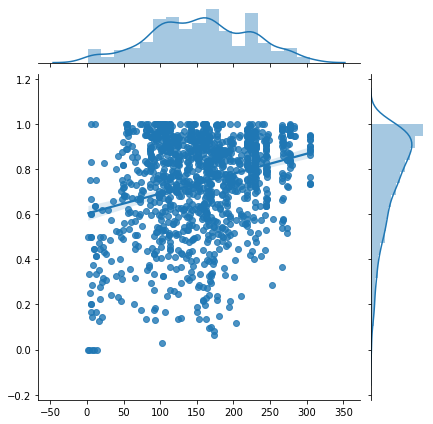

In [65]:
# 1.5
print(np.corrcoef(x=[len(l) for l in count], y=[sum(l)/len(l) for l in count]))
sns.jointplot(x=[len(l) for l in count], y=[sum(l)/len(l) for l in count], kind='reg')